a: 2.975691260854669e-112
b: 0.12712321571690732


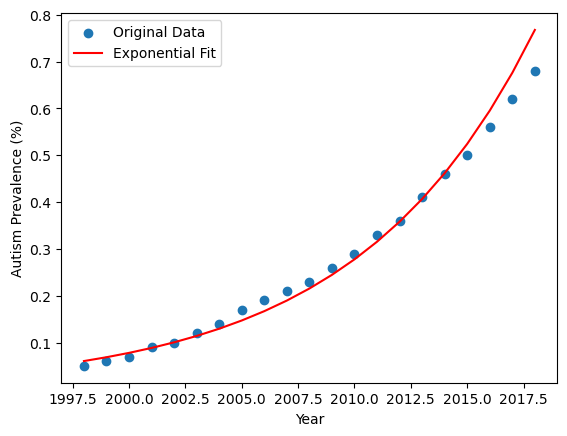

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your data from the CSV file
data = pd.read_csv('autism_rate.csv')

# Convert the 'Autism Prevalence' column to numeric (removing '%' sign)
data['Autism Prevalence'] = data['Autism Prevalence'].str.replace('%', '').astype(float)

# Define the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Define the linearized function for regression
def linearized_func(x, A, b):
    return A + b * x

# Transform the data
Y = np.log(data['Autism Prevalence'])  # Take natural logarithm of y-values
X = data['Year']  # Original x-values

# Perform linear regression on the transformed data
params, covariance = curve_fit(linearized_func, X, Y)

# Retrieve the parameters in the exponential form
A, b = params
a = np.exp(A)

# Print the resulting parameters
print("a:", a)
print("b:", b)

# Plot the original data and the regression curve
plt.scatter(X, data['Autism Prevalence'], label='Original Data')
plt.plot(X, exponential_func(X, a, b), color='red', label='Exponential Fit')
plt.xlabel('Year')
plt.ylabel('Autism Prevalence (%)')
plt.legend()
plt.show()


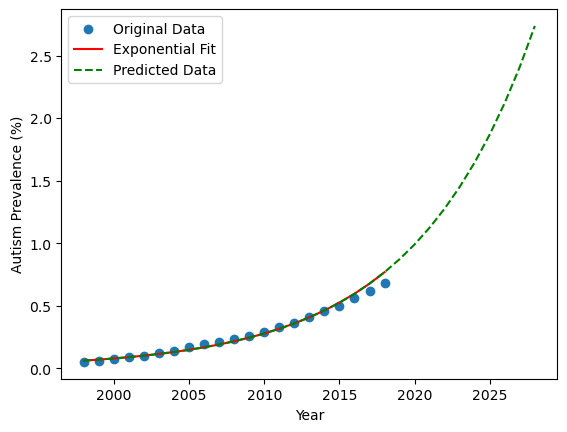

Predicted Autism Prevalence for the next 10 years:
Year 2019: 0.872%
Year 2020: 0.990%
Year 2021: 1.124%
Year 2022: 1.276%
Year 2023: 1.449%
Year 2024: 1.646%
Year 2025: 1.869%
Year 2026: 2.122%
Year 2027: 2.410%
Year 2028: 2.737%


In [2]:
# Number of years to predict in the future
future_years = 10

# Generate future years
future_X = np.arange(data['Year'].min(), data['Year'].max() + future_years + 1)

# Predict Autism Prevalence for future years using the exponential function
predicted_prevalence = exponential_func(future_X, a, b)

# Plot the original data, the regression curve, and the predicted values for the next 10 years
plt.scatter(X, data['Autism Prevalence'], label='Original Data')
plt.plot(X, exponential_func(X, a, b), color='red', label='Exponential Fit')
plt.plot(future_X, predicted_prevalence, color='green', linestyle='dashed', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Autism Prevalence (%)')
plt.legend()
plt.show()

# Print the predicted prevalence for the next 10 years
print("Predicted Autism Prevalence for the next 10 years:")
for year, prevalence in zip(future_X[-future_years:], predicted_prevalence[-future_years:]):
    print(f"Year {year}: {prevalence:.3f}%")
